[Dataset](https://www.kaggle.com/neuromusic/avocado-prices)

Предскажем количество купленных авокадо на основании его цены.

In [165]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

avo = pd.read_csv('avocado.csv')

avo.head()

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany


Проверим датасет на тип данных и пропущенные значения.

In [166]:
avo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18249 entries, 0 to 18248
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0    18249 non-null  int64  
 1   Date          18249 non-null  object 
 2   AveragePrice  18249 non-null  float64
 3   Total Volume  18249 non-null  float64
 4   4046          18249 non-null  float64
 5   4225          18249 non-null  float64
 6   4770          18249 non-null  float64
 7   Total Bags    18249 non-null  float64
 8   Small Bags    18249 non-null  float64
 9   Large Bags    18249 non-null  float64
 10  XLarge Bags   18249 non-null  float64
 11  type          18249 non-null  object 
 12  year          18249 non-null  int64  
 13  region        18249 non-null  object 
dtypes: float64(9), int64(2), object(3)
memory usage: 1.9+ MB


Создадим новый датасет, убрав ненужные колонки.

In [167]:
df = avo[['AveragePrice', 'Total Volume', 'year', 'region']]
df.head()

,AveragePrice,Total Volume,year,region
0,1.33,64236.62,2015,Albany
1,1.35,54876.98,2015,Albany
2,0.93,118220.22,2015,Albany
3,1.08,78992.15,2015,Albany
4,1.28,51039.60,2015,Albany


Какие регионы США представлены в данных?

In [168]:
df["region"].unique()

array(['Albany', 'Atlanta', 'BaltimoreWashington', 'Boise', 'Boston',
       'BuffaloRochester', 'California', 'Charlotte', 'Chicago',
       'CincinnatiDayton', 'Columbus', 'DallasFtWorth', 'Denver',
       'Detroit', 'GrandRapids', 'GreatLakes', 'HarrisburgScranton',
       'HartfordSpringfield', 'Houston', 'Indianapolis', 'Jacksonville',
       'LasVegas', 'LosAngeles', 'Louisville', 'MiamiFtLauderdale',
       'Midsouth', 'Nashville', 'NewOrleansMobile', 'NewYork',
       'Northeast', 'NorthernNewEngland', 'Orlando', 'Philadelphia',
       'PhoenixTucson', 'Pittsburgh', 'Plains', 'Portland',
       'RaleighGreensboro', 'RichmondNorfolk', 'Roanoke', 'Sacramento',
       'SanDiego', 'SanFrancisco', 'Seattle', 'SouthCarolina',
       'SouthCentral', 'Southeast', 'Spokane', 'StLouis', 'Syracuse',
       'Tampa', 'TotalUS', 'West', 'WestTexNewMexico'], dtype=object)

Медианная цена на авокадо за указанный период.

In [169]:
df.groupby('year').agg({'AveragePrice': 'median'})

,AveragePrice
year,
2015,1.300
2016,1.300
2017,1.490
2018,1.345


Средняя цена на авокадо за указанный период.

In [170]:
df.groupby('year').agg({'AveragePrice': 'mean'})

,AveragePrice
year,
2015,1.375590
2016,1.338640
2017,1.515128
2018,1.347531


Найдём регион, где самые дорогие авокадо за несколько лет.

In [171]:
df.groupby('region').agg({'AveragePrice': 'mean'}).sort_values(by='AveragePrice', ascending=False)

,AveragePrice
region,
HartfordSpringfield,1.818639
SanFrancisco,1.804201
NewYork,1.727574
Philadelphia,1.632130
Sacramento,1.621568
Charlotte,1.606036
Northeast,1.601923
Albany,1.561036
Chicago,1.556775


Проверим цену за несколько лет.

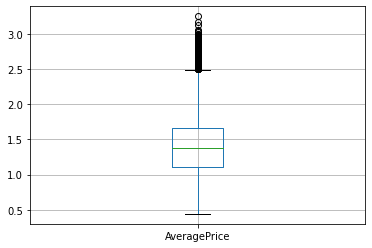

In [172]:
df.boxplot(column='AveragePrice')

В целом цена не превышает 1.6 доллара. Но есть довольно много выбросов.

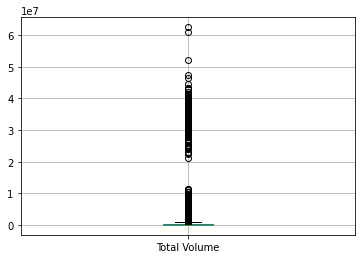

In [173]:
df.boxplot(column='Total Volume')

В продажах авокадо ещё больше выбросов.

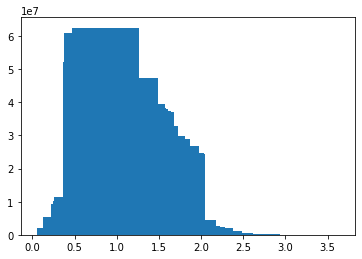

In [174]:
plt.bar(df.AveragePrice, df['Total Volume'])
plt.show()

Стабильно высокий спрос от 0.4 до 1.3. С ростом цены покупают немного меньше. Серьезное падение спроса наблюдается от 2.1 доллара за штуку.

Анализ проведён. Приступим к предсказаднию количество проданных авокадо.

In [175]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, max_error
from sklearn.metrics import mean_squared_log_error, median_absolute_error
from sklearn.preprocessing import MinMaxScaler

In [176]:
x = df['AveragePrice'].values
y = df['Total Volume'].values

# задам свой параметр разброса, так как модель даёт отрицательные предсказанные
# значения
f_range = (0.05, 1)

x = MinMaxScaler(f_range).fit_transform(x.reshape(-1, 1))
y = MinMaxScaler(f_range).fit_transform(y.reshape(-1, 1))

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2,
                                                    random_state=20)

In [177]:
model = LinearRegression()
model.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [178]:
model_pred = model.predict(x_test)

ms = mean_squared_error(y_test, model_pred)
r2 = r2_score(y_test, model_pred)
ma = mean_absolute_error(y_test, model_pred)
max_e = max_error(y_test, model_pred)
msqe = mean_squared_log_error(y_test, model_pred)
medae = median_absolute_error(y_test, model_pred)
print('MSE: {}\nMAE: {}\nMQLE: {}'.format(ms, ma, msqe))
print('Max_error: {}\nMedian_AE: {}'.format(max_e, medae))

MSE: 0.0026645878577019316
MAE: 0.0174093712866716
MQLE: 0.0015632447855981181
Max_error: 0.9236601792415428
Median_AE: 0.011317978483955524


Отличные показатели оценок. Данная модель довольно примитивна, но может быть использована для предсказания количество купленных авокадо. Для более точного предсказания требуется больше признаков.